In [1]:
# IT 비즈니스 혁신 머신러닝 모델 코드 리뷰

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math
import numpy as np

health = pd.read_csv("C:/RDA02/archive/health_data_processed.csv")
# health.isnull().sum()
# msno.dendrogram(health)
    # 결측값 NA's 0
health = health.astype({"시도코드": "category", "성별" : "category", "흡연" : "category", "음주" : "category", "구강검진수검여부" : "category"})
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   시도코드      9858 non-null   category
 1   성별        9858 non-null   category
 2   나이        9858 non-null   int64   
 3   신장        9858 non-null   int64   
 4   체중        9858 non-null   int64   
 5   허리둘레      9858 non-null   float64 
 6   시력(좌)     9858 non-null   float64 
 7   시력(우)     9858 non-null   float64 
 8   청력(좌)     9858 non-null   int64   
 9   청력(우)     9858 non-null   int64   
 10  수축기혈압     9858 non-null   int64   
 11  이완기혈압     9858 non-null   int64   
 12  공복혈당      9858 non-null   int64   
 13  혈색소       9858 non-null   float64 
 14  요단백       9858 non-null   int64   
 15  혈청크레아티닌   9858 non-null   float64 
 16  AST       9858 non-null   int64   
 17  ALT       9858 non-null   int64   
 18  감마지티피     9858 non-null   int64   
 19  흡연        9858 non-null   category
 20  음주      

In [2]:
health.rename(columns = {
    "시도코드" : "region", 
    "성별" : "gender", "나이" : "age", "신장" : "height", "체중" : "weight", "허리둘레" : "waist", 
    "시력(좌)" : "left_eyesight", "시력(우)" : "right_eyesight", "청력(좌)" : "left_hearing", "청력(우)" : "right_hearing",
    "수축기혈압" : "systolic_blood_pressure", "이완기혈압" : "diastolic_blood_pressure",
    "공복혈당" : "blood_glucose", "혈색소" : "hemoglobin",
    "요단백" : "urine_protein", "혈청크레아티닌" : "serum_creatinine",
    "감마지티피" : "gamma_GTP",
    "흡연" : "smoking", "음주" : "drinking",
    "구강검진수검여부" : "oral_examination_or_not"}, inplace =True)
health.head()
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   region                    9858 non-null   category
 1   gender                    9858 non-null   category
 2   age                       9858 non-null   int64   
 3   height                    9858 non-null   int64   
 4   weight                    9858 non-null   int64   
 5   waist                     9858 non-null   float64 
 6   left_eyesight             9858 non-null   float64 
 7   right_eyesight            9858 non-null   float64 
 8   left_hearing              9858 non-null   int64   
 9   right_hearing             9858 non-null   int64   
 10  systolic_blood_pressure   9858 non-null   int64   
 11  diastolic_blood_pressure  9858 non-null   int64   
 12  blood_glucose             9858 non-null   int64   
 13  hemoglobin                9858 non-null   float6

In [3]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

feature_cols=['ALT', 
              'gamma_GTP',
              'blood_glucose',
              'serum_creatinine',
              'age',
              'diastolic_blood_pressure',
              'hemoglobin',
              'waist', 
              'AST']

X = health[feature_cols]
X = X.iloc[:9858]
y = health.drinking
    # label인 y변수 = 음주 여부
print(X)
print(y)

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

      ALT  gamma_GTP  blood_glucose  serum_creatinine  age  \
0      27         21             90               1.1    9   
1      15         15             87               0.5   13   
2      25          7            102               0.7   12   
3      97         72            146               1.2   13   
4      17         14            110               0.7   12   
...   ...        ...            ...               ...  ...   
9853   21         18            115               1.1   17   
9854   21         20            120               0.7   13   
9855   22         21            117               0.7   11   
9856   27         35             86               1.0   12   
9857   24         30            105               0.6   13   

      diastolic_blood_pressure  hemoglobin  waist  AST  
0                           79        15.0   72.1   21  
1                           73        12.7   81.0   18  
2                           80        12.8   70.0   27  
3                          

In [4]:
# confusion matrix로 모델 성능평가

# 정확도(정분류율)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 

# 재현률 구간 [0.53551402, 0.65448029]
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

# 정밀도 구간 [0.54312796, 0.64751773]
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

# F1 점수 [0.53929412, 0.65098039]
# F1 score = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

# 혼동행렬 (채점표)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[573, 497],
       [482, 913]], dtype=int64)

In [5]:
from sklearn import tree
'''
주피터 노트북에서 설치
!pip install graphviz

cmd 명령어 프롬프트에서 설치
conda install python-graphviz
dot -Tpng tree.dot -o tree.png
'''

'\n주피터 노트북에서 설치\n!pip install graphviz\n\ncmd 명령어 프롬프트에서 설치\nconda install python-graphviz\ndot -Tpng tree.dot -o tree.png\n'

In [8]:
# visualize decision tree of classification[CART]

'''
[Error]
from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz
import mglearn

export_graphviz(tree, 
                out_file = "tree.dot", 
                class_names=[ "No", "Yes"], 
                feature_names = health[feature_cols], 
                impurity = False, filled = True)


# ValueError: Length of feature_names, 21 does not match number of features, 2

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))
'''

from sklearn.tree import plot_tree # tree diagram

plot_tree(tree)

TypeError: <module 'sklearn.tree' from 'C:\\Users\\sooyeon Kang\\anaconda3\\lib\\site-packages\\sklearn\\tree\\__init__.py'> is not an estimator instance.

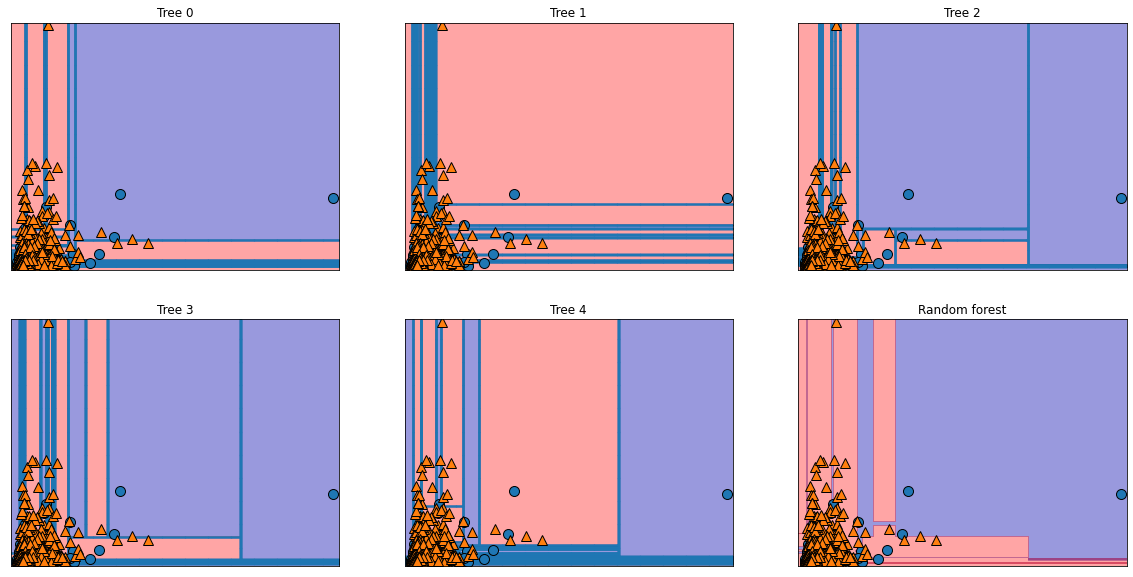

In [11]:
from sklearn.ensemble import RandomForestClassifier
import mglearn

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [12]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.696


In [13]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.59459459 0.61216216 0.62837838 0.60487145 0.61705007 0.60081191
 0.59404601 0.59539919 0.63599459 0.60893099]
Random forest:  [0.68243243 0.66756757 0.7027027  0.70230041 0.66847091 0.65223275
 0.70094723 0.66982409 0.70094723 0.69012179]
Accuracy mean
Decision tree :0.609
Random forest :0.684


<AxesSubplot:>

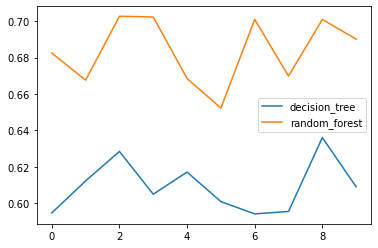

In [14]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()